In [431]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import array

plt.style.use("classic")

class person:
    maxDistance = 1
    maxIllDistance = 0.1
    def __init__(self, x,y, status):
        self.x = x
        self.y = y
        self.status = status
    def move(self):
        if self.status == 'h':
            self.x += random.random()*self.maxDistance*math.cos(random.random()*360)
            self.y += random.random()*self.maxDistance*math.sin(random.random()*360)
        if self.status == 'i':
            self.x += random.random()*self.maxIllDistance*math.cos(random.random()*360)
            self.y += random.random()*self.maxIllDistance*math.sin(random.random()*360)
    def info(self):
        return f'x: {self.x},y: {self.y},status: {self.status}'
    def __str__(self): 
        return str(self.info)
    

class population:
    infectionProb = 0.2
    infectionDist = 1

    def __init__(self,people, h, w, popsize):
        self.h = h
        self.w = w
        self.popsize = popsize
        self.people = []
        for i in range(popsize):
            self.people.append(person(random.random()*w,random.random()*h, random.choices(['h','i','c'], [1-self.infectionProb,self.infectionProb*0.5,self.infectionProb*0.5])))
    def move(self):
        for i in self.people:
            i.move()
            i.x = i.x % self.w
            i.y = i.y % self.h
        for i in self.people:
            for j in self.people:
                if j != i:
                    if (i.status == 'i' or i.status == 'c') and j.status == 'h':
                        if (i.x-j.x)**2+(i.y-j.y)**2 < self.infectionDist**2:
                            j.status = random.choices(['i','c'],[0.5,0.5])
    def paint(self):
        plt.figure(figsize=(10,10))
        plt.axes().set_aspect('equal')
        plt.xlim(0,self.w)
        plt.ylim(0,self.h)
        
        for i in range(self.popsize):
            if self.people[i].status[0] == 'h':
                plt.plot(self.people[i].x,self.people[i].y,'go')
            elif self.people[i].status[0] == 'i':
                plt.plot(self.people[i].x,self.people[i].y,'ro')
            elif self.people[i].status[0] == 'c':
                plt.plot(self.people[i].x,self.people[i].y,'yo')

        plt.show()

In [440]:
Pop = population([],10,20,100)

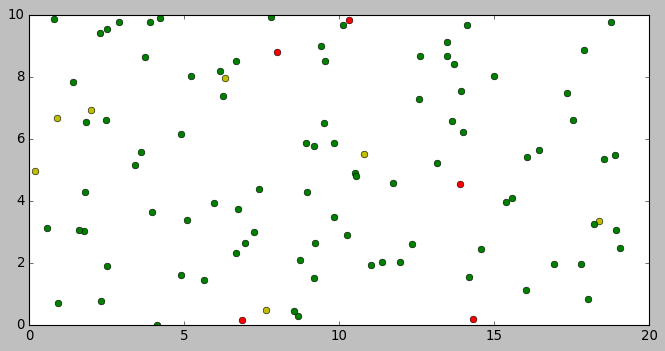

In [441]:
Pop.paint()

In [442]:
Pop.move()

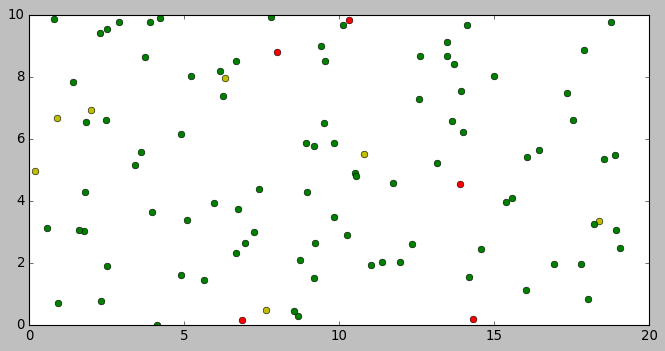

In [443]:
Pop.paint()